In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Import the uncleaned the data, later on when the cleaned datasets are done, change to unclean the data sets
train_data= pd.read_csv('../data/train.csv')

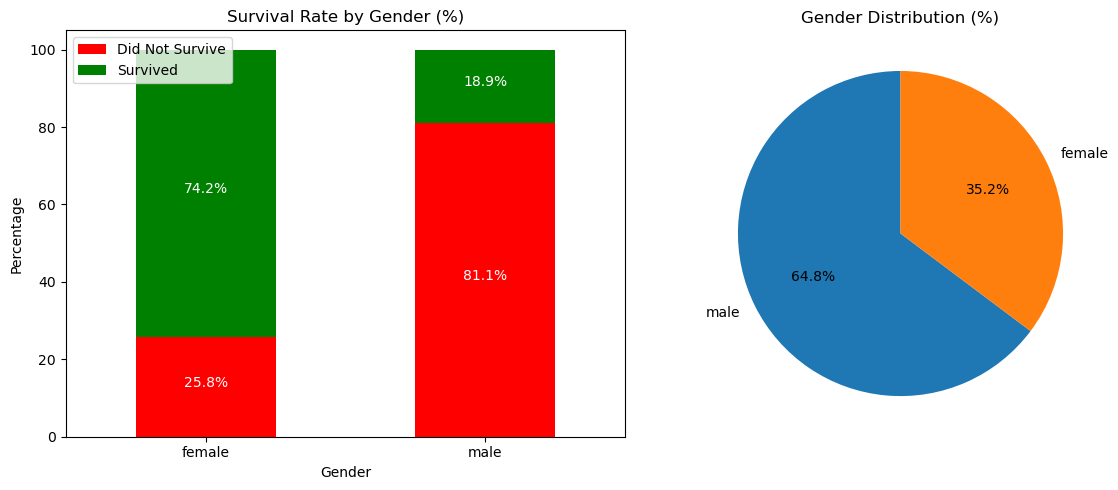

In [13]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
# Calculate percentages
sex_survival_pct = pd.crosstab(
    train_data['Sex'],
    train_data['Survived'],
    normalize='index'
) * 100

# Rename columns for clarity
sex_survival_pct.columns = ['Did Not Survive', 'Survived']

sex_survival_pct.plot(
    kind='bar',
    stacked=True,
    ax=axes[0],
    color = ['red','green']
)

axes[0].set_title("Survival Rate by Gender (%)")
axes[0].set_ylabel("Percentage")
axes[0].set_xlabel("Gender")
axes[0].tick_params(axis='x', labelrotation=0)


# Add percentage labels inside bars
for i, sex in enumerate(sex_survival_pct.index):
    no_survive = sex_survival_pct.loc[sex, 'Did Not Survive']
    survive = sex_survival_pct.loc[sex, 'Survived']
    
    axes[0].text(i, no_survive/2, f"{no_survive:.1f}%", ha='center', color='white')
    axes[0].text(i, no_survive + survive/2, f"{survive:.1f}%", ha='center', color='white')

# Plot 2: Percentage of Male vs Female
gender_pct = train_data['Sex'].value_counts(normalize=True) * 100

axes[1].pie(
    gender_pct,
    labels=gender_pct.index,
    autopct='%1.1f%%',
    startangle=90
)
axes[1].set_title("Gender Distribution (%)")

plt.tight_layout()


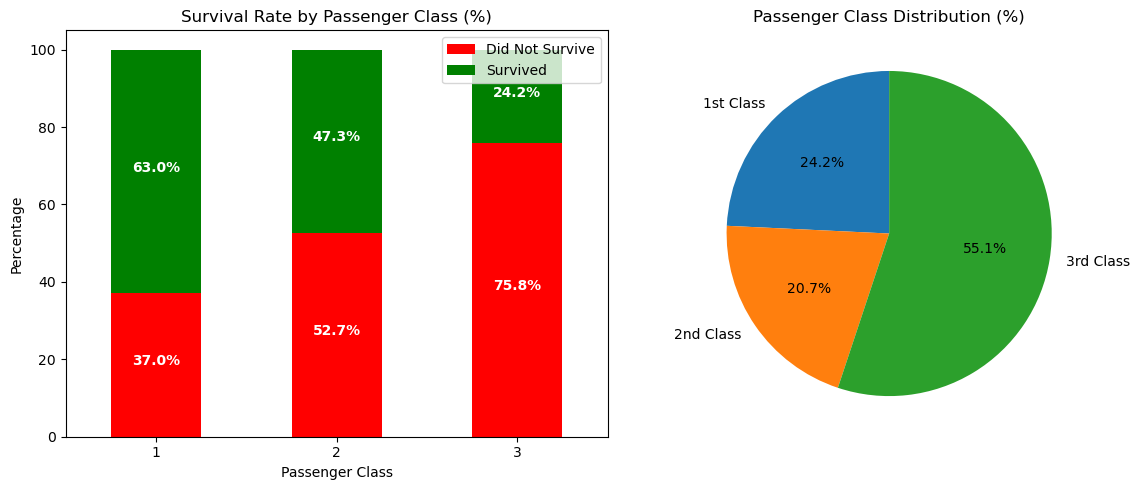

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Calculate survival percentages by Pclass
pclass_survival_pct = pd.crosstab(
    train_data['Pclass'],
    train_data['Survived'],
    normalize='index'
) * 100

# Rename columns for clarity
pclass_survival_pct.columns = ['Did Not Survive', 'Survived']

# Plot stacked bar chart with colors
pclass_survival_pct.plot(
    kind='bar',
    stacked=True,
    ax=axes[0],
    color=['red', 'green']
)

# Titles and labels
axes[0].set_title("Survival Rate by Passenger Class (%)")
axes[0].set_ylabel("Percentage")
axes[0].set_xlabel("Passenger Class")
axes[0].tick_params(axis='x', labelrotation=0)


# Add percentage labels inside bars
for i, pclass in enumerate(pclass_survival_pct.index):
    no_survive = pclass_survival_pct.loc[pclass, 'Did Not Survive']
    survive = pclass_survival_pct.loc[pclass, 'Survived']
    
    axes[0].text(i, no_survive/2, f"{no_survive:.1f}%", ha='center', color='white', fontweight='bold')
    axes[0].text(i, no_survive + survive/2, f"{survive:.1f}%", ha='center', color='white', fontweight='bold')


# Plot 2: Pclass distribution pie chart
class_counts = train_data['Pclass'].value_counts().sort_index()

axes[1].pie(
    class_counts,
    labels=['1st Class', '2nd Class', '3rd Class'],
    autopct='%1.1f%%',
    startangle=90
)
axes[1].set_title("Passenger Class Distribution (%)")

plt.tight_layout()
plt.show()